frames 61 H / W 480 

window difference 6 12 12

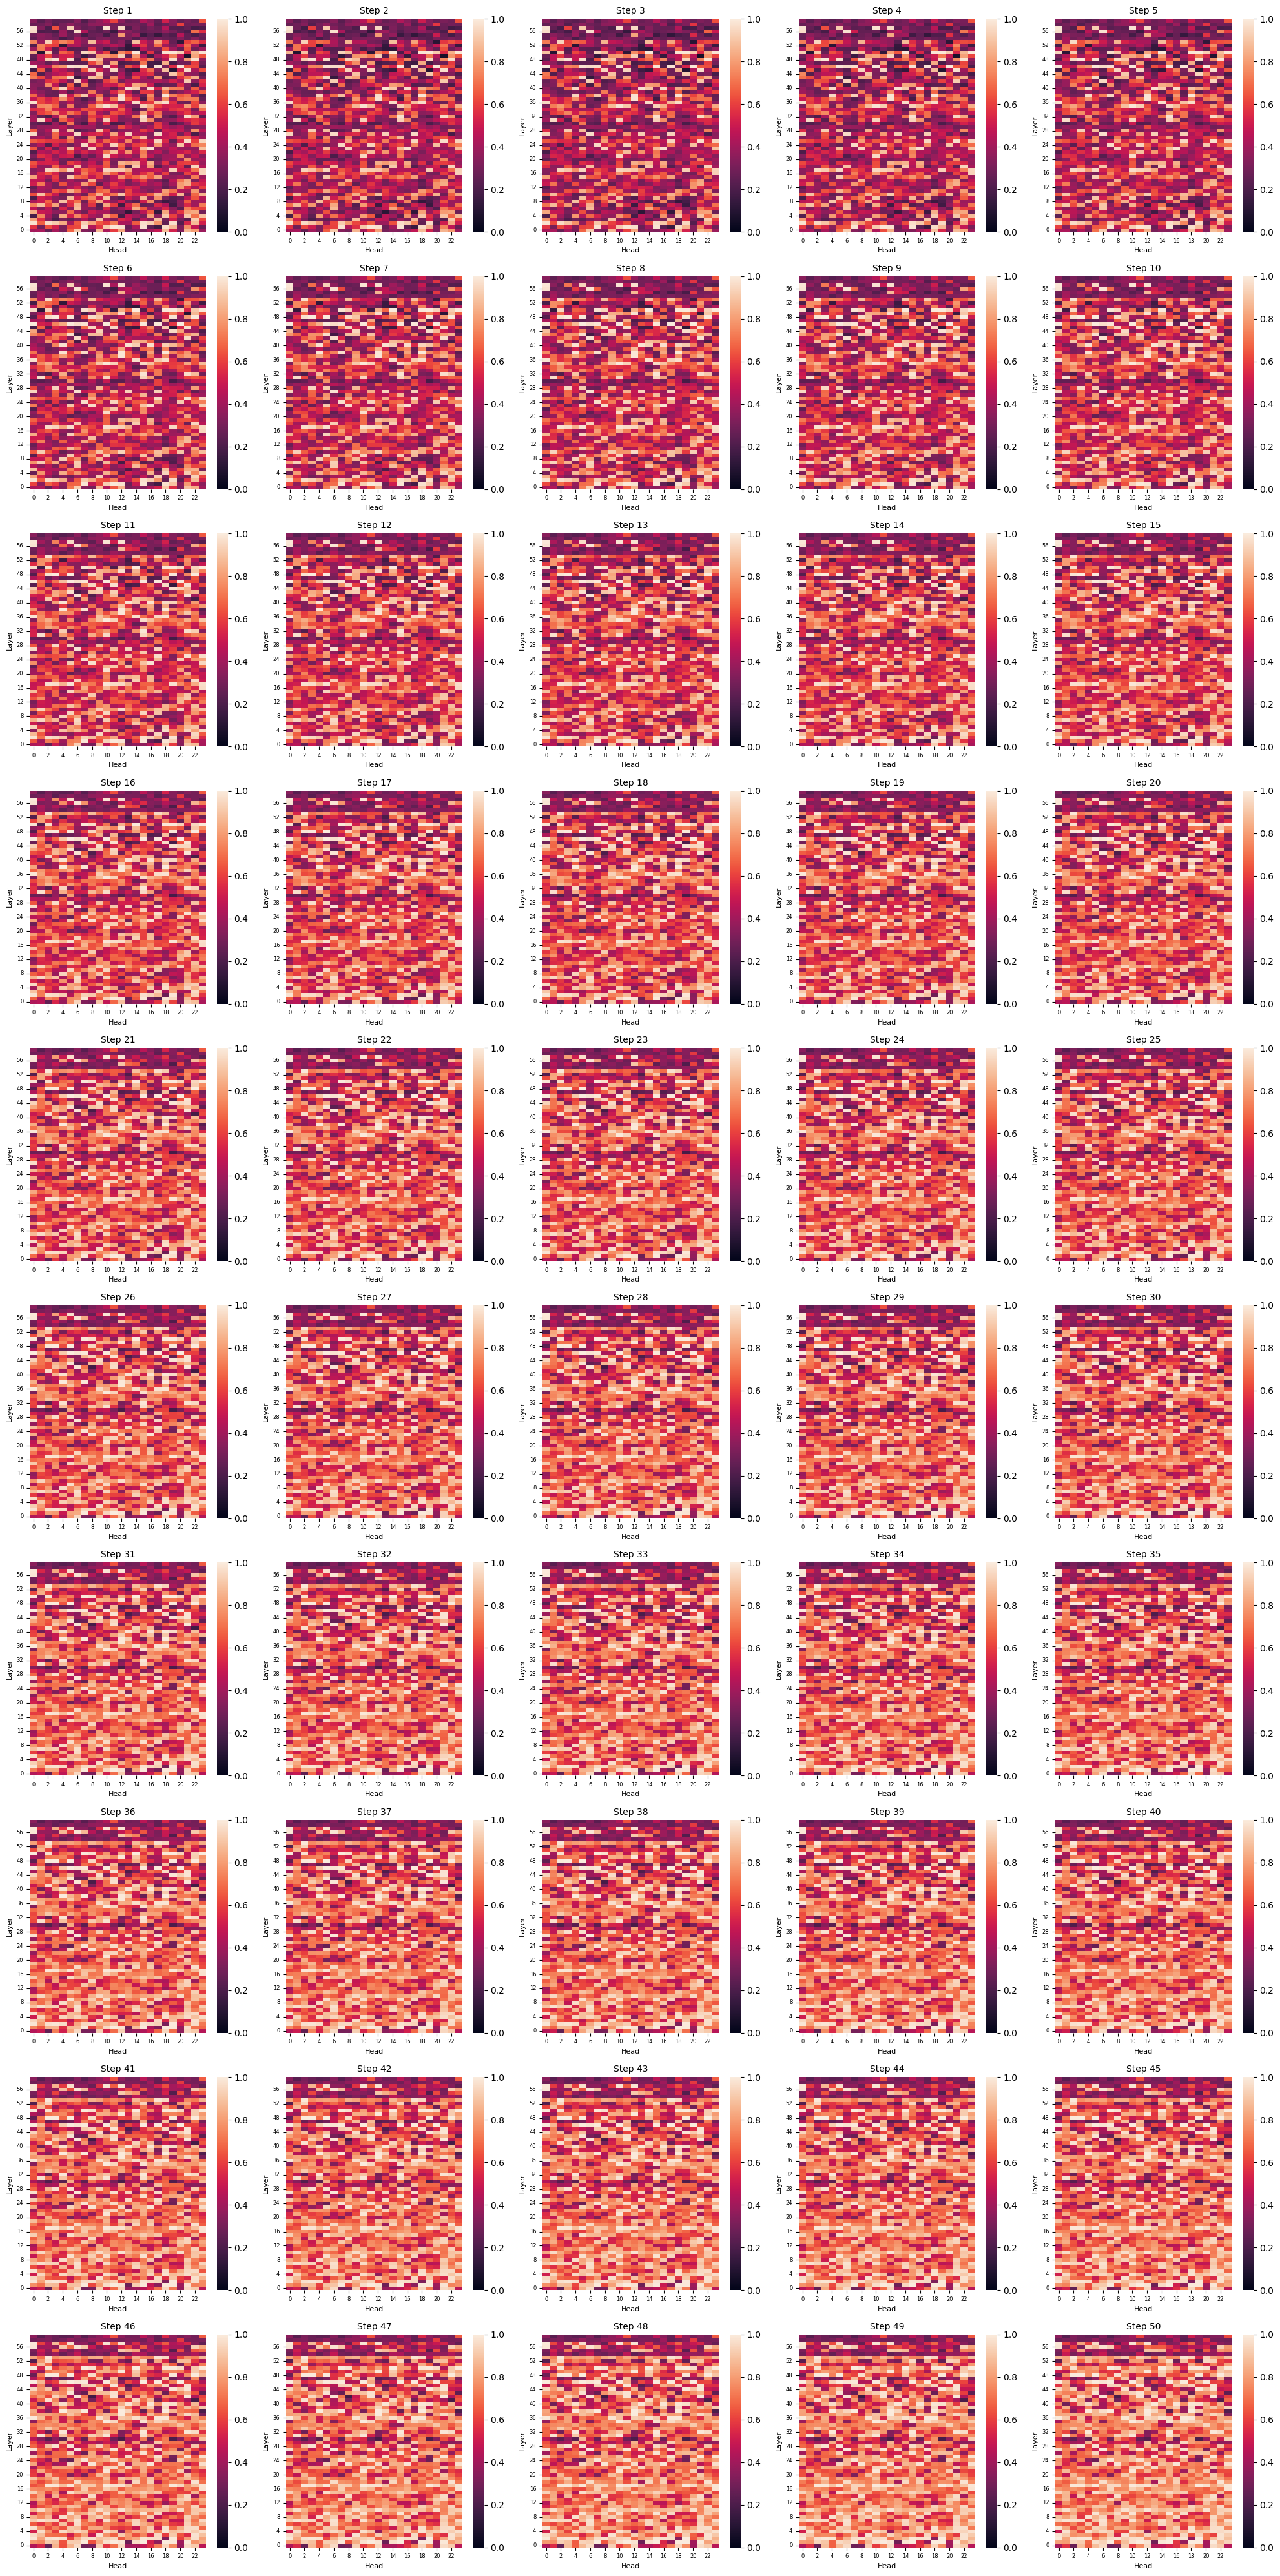

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from IPython.display import display
import math

def parse_log_file():
    results = []
    with open('logs/recall_50step.txt', 'r') as f:
        for line in f:
            match = re.search(r'step(\d+)_layer(\d+)_head(\d+)_window_diff', line)
            if match:
                step = int(match.group(1))
                layer = int(match.group(2))
                head = int(match.group(3))
                recall_match = re.search(r's recall: ([\d.]+)', line)
                recall = float(recall_match.group(1)) if recall_match else None
                results.append([step, layer, head, recall])
    return np.array(results)

def plot_attention_recalls(data):
    steps = np.unique(data[:, 0])
    n_steps = len(steps)
    
    plots_per_row = 5
    n_rows = math.ceil(n_steps / plots_per_row)
    
    fig = plt.figure(figsize=(20, 4*n_rows))
    
    for idx, step in enumerate(steps):
        step_data = data[data[:, 0] == step]
        
        n_layers = int(np.max(step_data[:, 1])) + 1
        n_heads = int(np.max(step_data[:, 2])) + 1
        recall_matrix = np.zeros((n_layers, n_heads))
        
        for item in step_data:
            layer, head, recall = int(item[1]), int(item[2]), item[3]
            recall_matrix[layer, head] = recall
        
        ax = plt.subplot(n_rows, plots_per_row, idx + 1)
        sns.heatmap(recall_matrix, 
                    cmap='rocket',
                    vmin=0, 
                    vmax=1.0,
                    cbar_kws={'label': ''})
        
        plt.title(f'Step {int(step)}', fontsize=10)
        plt.xlabel('Head', fontsize=8)
        plt.ylabel('Layer', fontsize=8)
        plt.xticks(fontsize=6)
        plt.yticks(fontsize=6)
        
        plt.gca().invert_yaxis()
    
    plt.tight_layout()
    display(plt.gcf())
    plt.close()

# 运行代码并检查数据
data = parse_log_file()
plot_attention_recalls(data)

Maximum difference between adjacent steps:
Between steps 7 and 8
Layer: 44, Head: 21
Values: 0.5000 -> 0.6414
Difference: 0.1414

Layer averages:
Layer 0: 0.5826740657662351
Layer 1: 0.715089840516448
Layer 2: 0.7859195268278321
Layer 3: 0.6356571511055032
Layer 4: 0.7351154555504521
Layer 5: 0.6587931529308358
Layer 6: 0.6317004643132289
Layer 7: 0.6738401606927316
Layer 8: 0.6361850821847717
Layer 9: 0.6597752206151685
Layer 10: 0.7616837338606517
Layer 11: 0.6595387489845356
Layer 12: 0.5687351076429089
Layer 13: 0.6451355597873529
Layer 14: 0.582408705689013
Layer 15: 0.6924233253548543
Layer 16: 0.681581568295757
Layer 17: 0.8013674856722355
Layer 18: 0.6578779139121373
Layer 19: 0.6826423628379902
Layer 20: 0.5368523755917947
Layer 21: 0.5844278392940759
Layer 22: 0.6668876067424814
Layer 23: 0.6448011482010285
Layer 24: 0.6419519259159764
Layer 25: 0.708203005194664
Layer 26: 0.567639525110523
Layer 27: 0.623080801529189
Layer 28: 0.6187612362330158
Layer 29: 0.4842567726721366


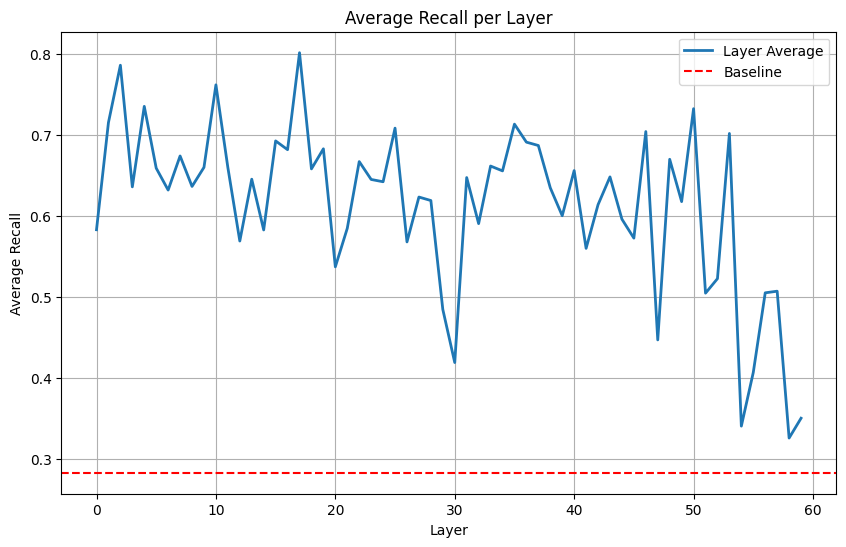

Head averages:
Head 0: 0.6121624366641044
Head 1: 0.600840474580725
Head 2: 0.593720748608311
Head 3: 0.6069059848984083
Head 4: 0.5974564596414565
Head 5: 0.6483907912572225
Head 6: 0.5975060957719882
Head 7: 0.5738213963111242
Head 8: 0.6072616468220949
Head 9: 0.6303625401109457
Head 10: 0.6524359939197699
Head 11: 0.6349524038756887
Head 12: 0.6262960639347632
Head 13: 0.5648046152591706
Head 14: 0.6025992100959023
Head 15: 0.6639624330550432
Head 16: 0.5980224341203769
Head 17: 0.5746792206913233
Head 18: 0.6234525771687428
Head 19: 0.5745950098410249
Head 20: 0.6045221923266848
Head 21: 0.6601326223487656
Head 22: 0.6553300572633743
Head 23: 0.6155387115478516



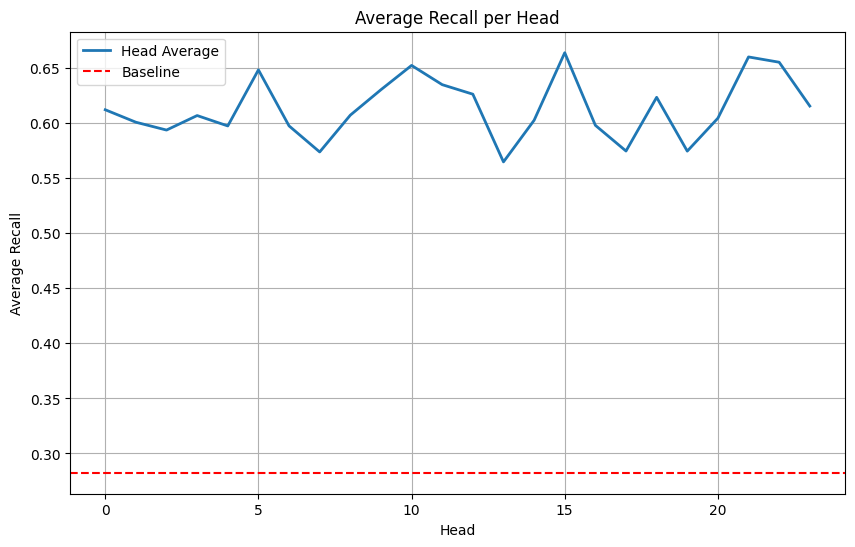

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from IPython.display import display
import math
%matplotlib inline 

def analyze_data(data):
    steps = np.unique(data[:, 0])
    n_layers = int(np.max(data[:, 1])) + 1
    n_heads = int(np.max(data[:, 2])) + 1
    
    # 1. Calculate maximum difference between adjacent steps
    max_diff = 0
    max_diff_info = None
    
    for step_idx in range(len(steps)-1):
        step = steps[step_idx]
        next_step = steps[step_idx+1]
        
        step_data = data[data[:, 0] == step]
        next_step_data = data[data[:, 0] == next_step]
        
        for layer in range(n_layers):
            for head in range(n_heads):
                current_recall = step_data[(step_data[:, 1] == layer) & (step_data[:, 2] == head)][0][3]
                next_recall = next_step_data[(next_step_data[:, 1] == layer) & (next_step_data[:, 2] == head)][0][3]
                diff = abs(next_recall - current_recall)
                
                if diff > max_diff:
                    max_diff = diff
                    max_diff_info = (step, next_step, layer, head, current_recall, next_recall)
    
    print("Maximum difference between adjacent steps:")
    print(f"Between steps {int(max_diff_info[0])} and {int(max_diff_info[1])}")
    print(f"Layer: {max_diff_info[2]}, Head: {max_diff_info[3]}")
    print(f"Values: {max_diff_info[4]:.4f} -> {max_diff_info[5]:.4f}")
    print(f"Difference: {max_diff:.4f}\n")
    
    # 2. Calculate and plot average recall for each layer
    print("Layer averages:")
    layer_avgs = []
    for layer in range(n_layers):
        layer_data = data[data[:, 1] == layer]
        layer_avg = np.mean(layer_data[:, 3])
        layer_avgs.append(layer_avg)
        print(f"Layer {layer}: {layer_avg}")
    print()
    
    plt.figure(figsize=(6, 6))
    plt.plot(range(n_layers), layer_avgs, '-', linewidth=2, label='Layer Average')
    plt.axhline(y=0.2825, color='r', linestyle='--', label='Baseline')
    plt.xlabel('Layer')
    plt.ylabel('Average Recall')
    plt.title('Average Recall per Layer')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # 3. Calculate and plot average recall for each head
    print("Head averages:")
    head_avgs = []
    for head in range(n_heads):
        head_data = data[data[:, 2] == head]
        head_avg = np.mean(head_data[:, 3])
        head_avgs.append(head_avg)
        print(f"Head {head}: {head_avg}")
    print()
    
    plt.figure(figsize=(6, 6))
    plt.plot(range(n_heads), head_avgs, '-', linewidth=2, label='Head Average')
    plt.axhline(y=0.2825, color='r', linestyle='--', label='Baseline')
    plt.xlabel('Head')
    plt.ylabel('Average Recall')
    plt.title('Average Recall per Head')
    plt.legend()
    plt.grid(True)
    plt.show()

# Load the data from the previous notebook's results
data = parse_log_file()
analyze_data(data)

frames 61 H / W 720 

window difference 6 12 12

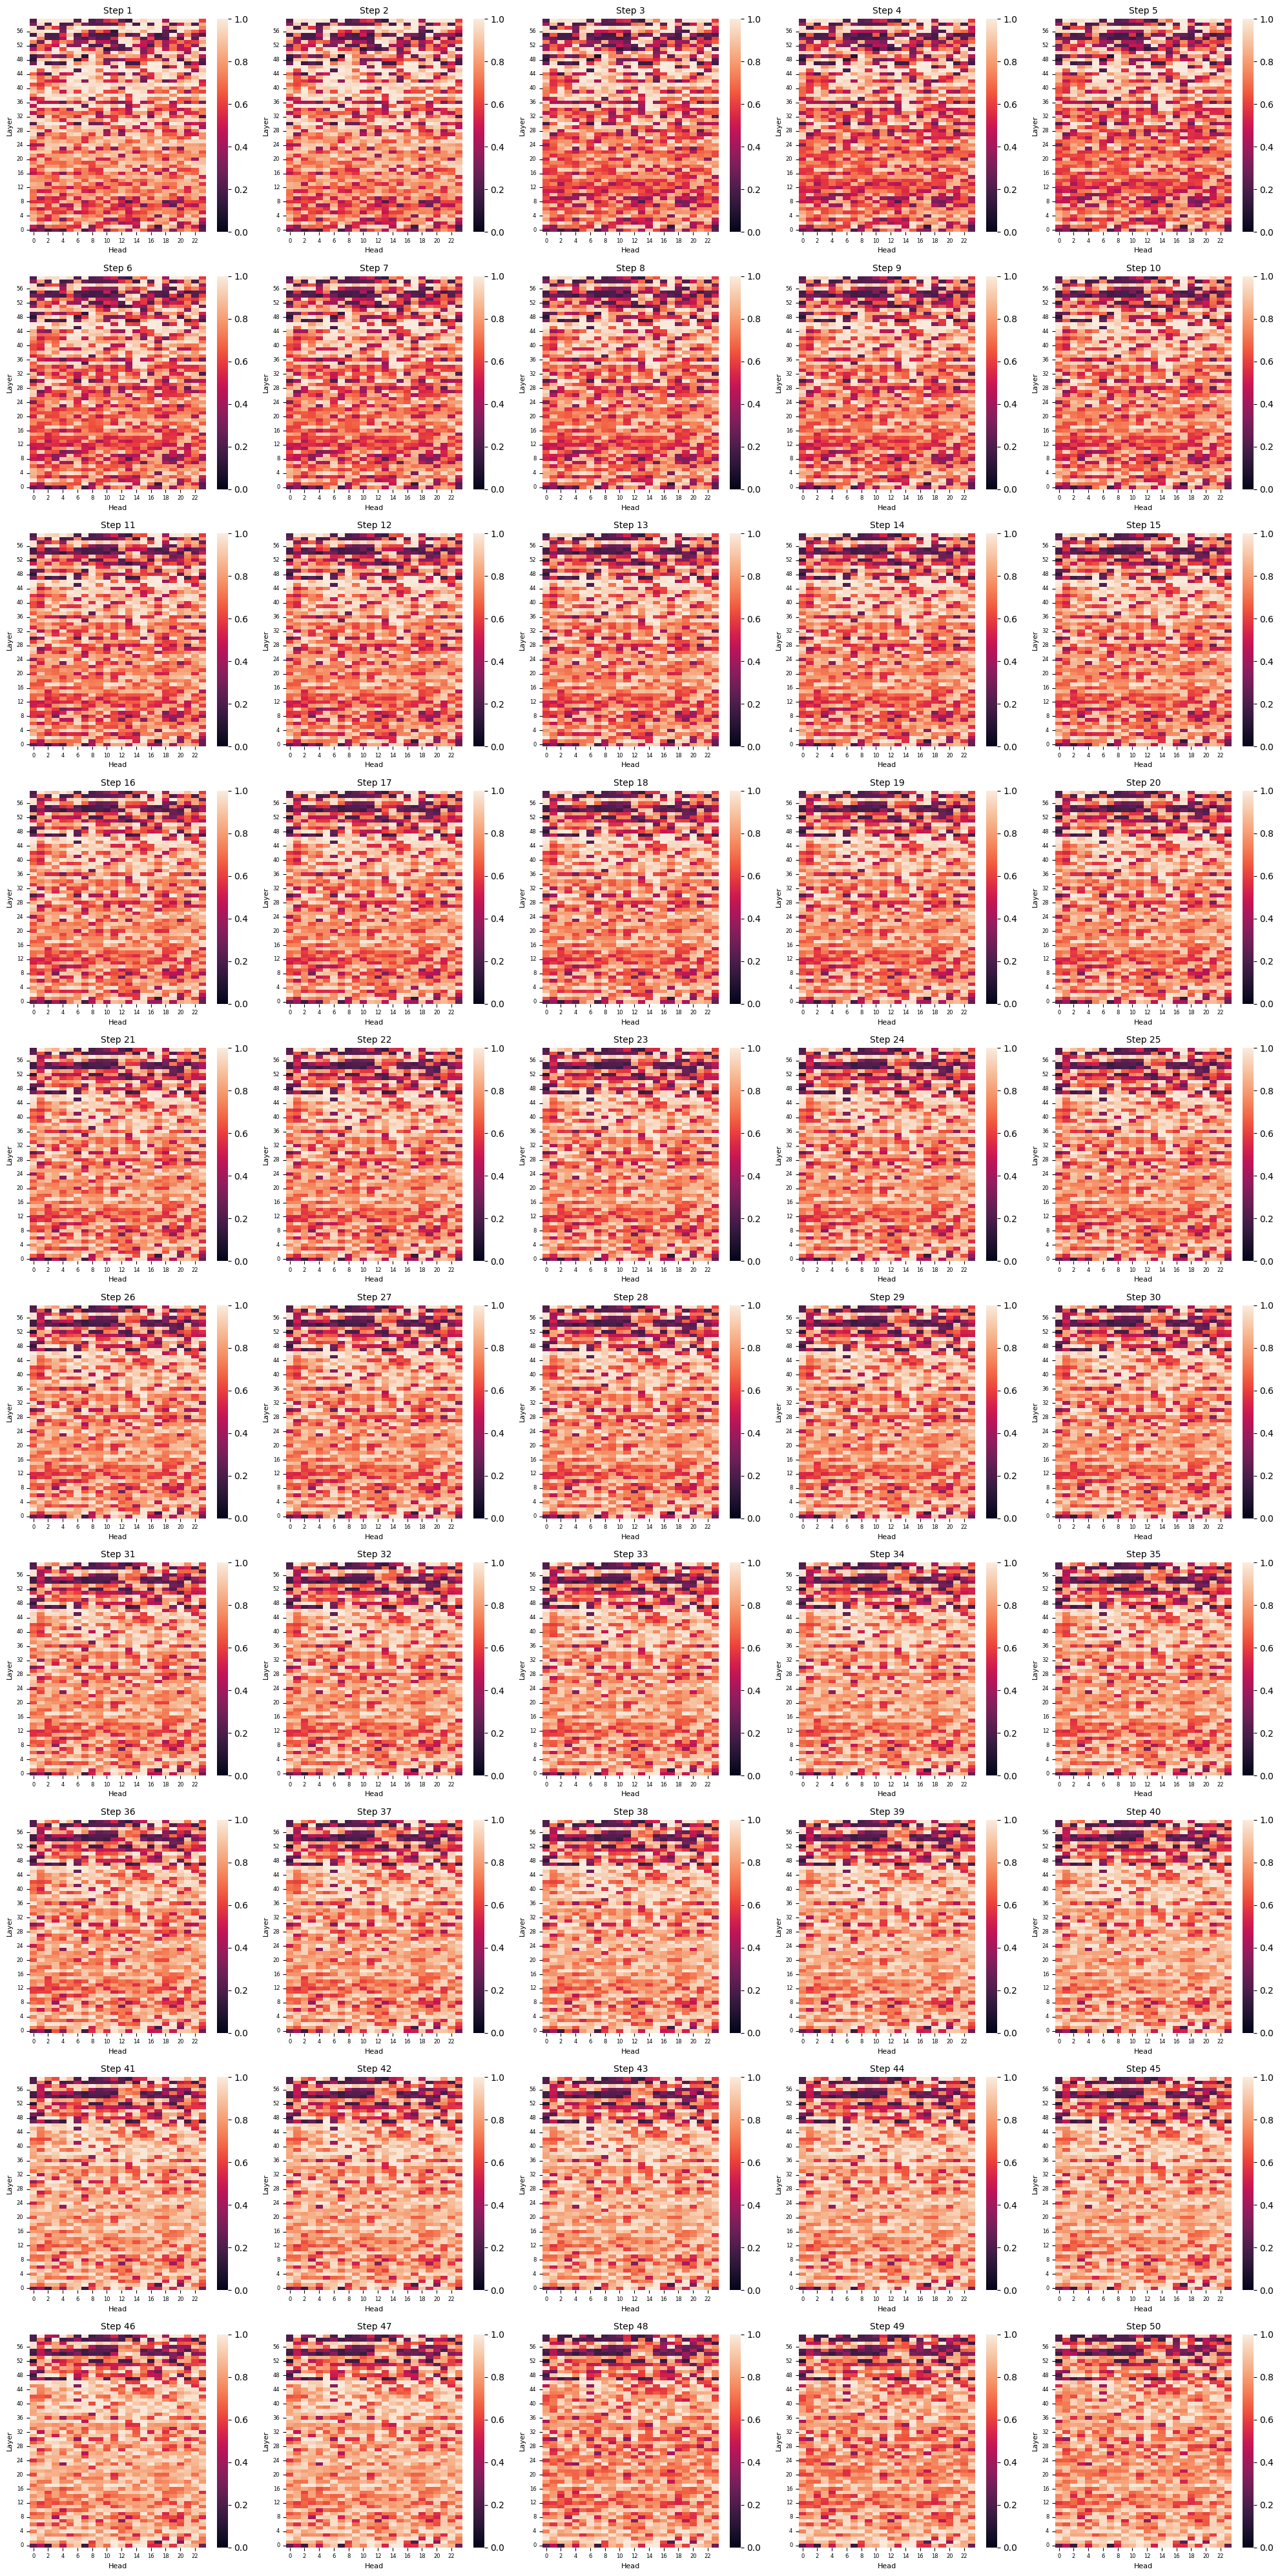

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from IPython.display import display
import math

def parse_log_file():
    results = []
    with open('logs/recall_50steps_61_720_720.txt', 'r') as f:
        for line in f:
            match = re.search(r'step(\d+)_layer(\d+)_head(\d+)_window_diff', line)
            if match:
                step = int(match.group(1))
                layer = int(match.group(2))
                head = int(match.group(3))
                recall_match = re.search(r's recall: ([\d.]+)', line)
                recall = float(recall_match.group(1)) if recall_match else None
                results.append([step, layer, head, recall])
    return np.array(results)

def plot_attention_recalls(data):
    steps = np.unique(data[:, 0])
    n_steps = len(steps)
    
    plots_per_row = 5
    n_rows = math.ceil(n_steps / plots_per_row)
    
    fig = plt.figure(figsize=(20, 4*n_rows))
    
    for idx, step in enumerate(steps):
        step_data = data[data[:, 0] == step]
        
        n_layers = int(np.max(step_data[:, 1])) + 1
        n_heads = int(np.max(step_data[:, 2])) + 1
        recall_matrix = np.zeros((n_layers, n_heads))
        
        for item in step_data:
            layer, head, recall = int(item[1]), int(item[2]), item[3]
            recall_matrix[layer, head] = recall
        
        ax = plt.subplot(n_rows, plots_per_row, idx + 1)
        sns.heatmap(recall_matrix, 
                    cmap='rocket',
                    vmin=0, 
                    vmax=1.0,
                    cbar_kws={'label': ''})
        
        plt.title(f'Step {int(step)}', fontsize=10)
        plt.xlabel('Head', fontsize=8)
        plt.ylabel('Layer', fontsize=8)
        plt.xticks(fontsize=6)
        plt.yticks(fontsize=6)
        
        plt.gca().invert_yaxis()
    
    plt.tight_layout()
    display(plt.gcf())
    plt.close()

# 运行代码并检查数据
data = parse_log_file()
plot_attention_recalls(data)

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

Number of samples in each group:
Group 0: 1440 samples
Group 1: 1440 samples
Group 2: 1440 samples
Group 3: 1440 samples
Group 4: 1440 samples
Group 5: 1440 samples
Group 6: 1440 samples
Group 7: 424800 samples


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

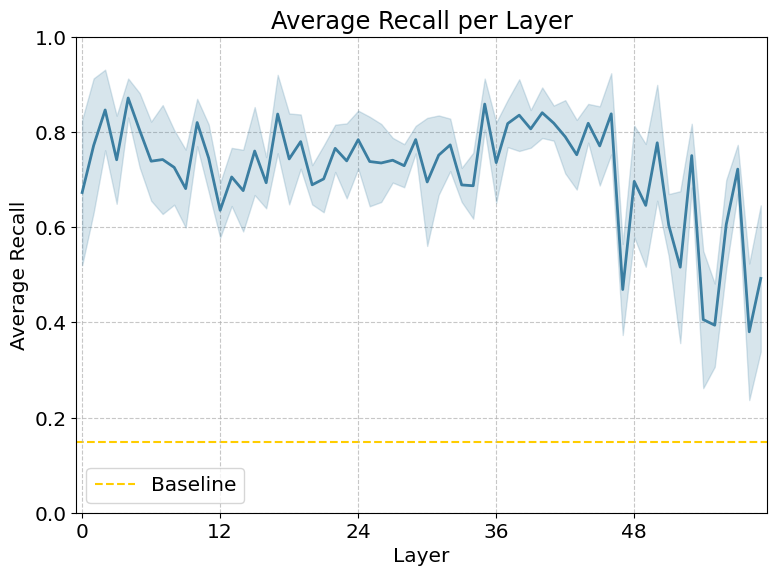

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from IPython.display import display
import math
%matplotlib inline 

def analyze_data(data):
    steps = np.unique(data[:, 0])
    n_layers = int(np.max(data[:, 1])) + 1
    n_heads = int(np.max(data[:, 2])) + 1
    
    # 1. Calculate maximum difference between adjacent steps
    max_diff = 0
    max_diff_info = None
    
    for step_idx in range(len(steps)-1):
        step = steps[step_idx]
        next_step = steps[step_idx+1]
        
        step_data = data[data[:, 0] == step]
        next_step_data = data[data[:, 0] == next_step]
        
        for layer in range(n_layers):
            for head in range(n_heads):
                current_recall = step_data[(step_data[:, 1] == layer) & (step_data[:, 2] == head)][0][3]
                next_recall = next_step_data[(next_step_data[:, 1] == layer) & (next_step_data[:, 2] == head)][0][3]
                diff = abs(next_recall - current_recall)
                
                if diff > max_diff:
                    max_diff = diff
                    max_diff_info = (step, next_step, layer, head, current_recall, next_recall)
    
    print("Maximum difference between adjacent steps:")
    print(f"Between steps {int(max_diff_info[0])} and {int(max_diff_info[1])}")
    print(f"Layer: {max_diff_info[2]}, Head: {max_diff_info[3]}")
    print(f"Values: {max_diff_info[4]:.4f} -> {max_diff_info[5]:.4f}")
    print(f"Difference: {max_diff:.4f}\n")
    
    # 2. Calculate and plot average recall for each layer
    print("Layer averages:")
    layer_avgs = []
    for layer in range(n_layers):
        layer_data = data[data[:, 1] == layer]
        layer_avg = np.mean(layer_data[:, 3])
        layer_avgs.append(layer_avg)
        print(f"Layer {layer}: {layer_avg}")
    print()
    
    plt.figure(figsize=(6, 6))
    plt.plot(range(n_layers), layer_avgs, '-', linewidth=2, label='Layer Average')
    plt.axhline(y=0.1485, color='r', linestyle='--', label='Baseline')
    plt.xlabel('Layer')
    plt.ylabel('Average Recall')
    plt.title('Average Recall per Layer')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # 3. Calculate and plot average recall for each head
    print("Head averages:")
    head_avgs = []
    for head in range(n_heads):
        head_data = data[data[:, 2] == head]
        head_avg = np.mean(head_data[:, 3])
        head_avgs.append(head_avg)
        print(f"Head {head}: {head_avg}")
    print()
    
    plt.figure(figsize=(6, 6))
    plt.plot(range(n_heads), head_avgs, '-', linewidth=2, label='Head Average')
    plt.axhline(y=0.1485, color='r', linestyle='--', label='Baseline')
    plt.xlabel('Head')
    plt.ylabel('Average Recall')
    plt.title('Average Recall per Head')
    plt.legend()
    plt.grid(True)
    plt.show()

# Load the data from the previous notebook's results
data = parse_log_file()
analyze_data(data)

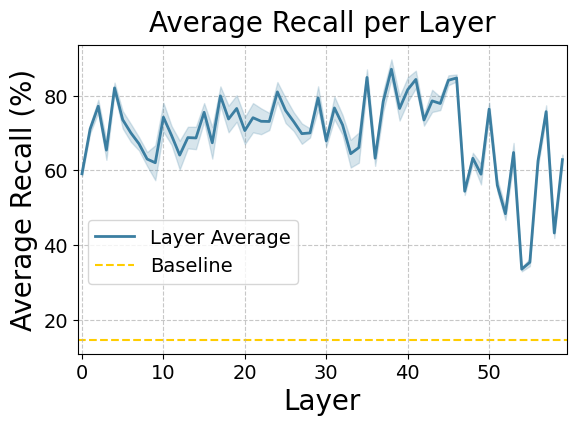

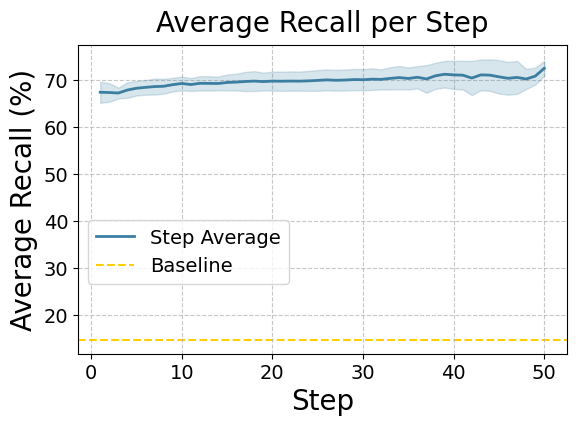

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from IPython.display import display
import math

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']

def parse_log_file():
    # [Previous parse_log_file function remains exactly the same]
    # First pass: collect all steps to determine groups
    all_data = []
    
    with open('logs/recall_50_steps_61_720_720_multi.txt', 'r') as f:
        for line in f:
            if "'s recall:" not in line:
                continue
                
            parts = line.split("'s recall:")
            if len(parts) != 2:
                continue
                
            info = parts[0].split('_')
            recall = float(parts[1].strip())
            
            step = int(info[0][4:])
            layer = int(info[1][5:])
            head = int(info[2][4:])
            
            all_data.append([step, layer, head, recall])
    
    groups = {i: [] for i in range(8)}
    current_group = 0
    
    data_idx = 0
    while data_idx < len(all_data):
        step = all_data[data_idx][0]
        mod_step = (step-1) % 50+1
        
        groups[current_group].append([mod_step] + all_data[data_idx][1:])
        
        if mod_step == 50 and all_data[data_idx][1] == 59 and all_data[data_idx][2] == 23:
            current_group = (current_group + 1) % 8
            
        data_idx += 1
        
    return {k: np.array(v) for k, v in groups.items() if len(v) > 0}

def analyze_data(groups):
    n_layers = int(max(max(group[:, 1]) for group in groups.values())) + 1
    
    # First plot - Layer analysis
    plt.figure(figsize=(6, 4.5))
    
    layer_avgs_by_group = []
    for group_id in sorted(groups.keys()):
        group_data = groups[group_id]
        layer_avgs = []
        for layer in range(n_layers):
            layer_data = group_data[group_data[:, 1] == layer]
            layer_avg = np.mean(layer_data[:, 3]) * 100
            layer_avgs.append(layer_avg)
        layer_avgs_by_group.append(layer_avgs)
    
    layer_avgs_by_group = np.array(layer_avgs_by_group)
    layer_means = np.mean(layer_avgs_by_group, axis=0)
    layer_stds = np.std(layer_avgs_by_group, axis=0)
    
    x = np.arange(n_layers)
    plt.plot(x, layer_means, '-', color='#3b7ea1', linewidth=2, label='Layer Average', zorder=2)
    plt.fill_between(x, layer_means - layer_stds, layer_means + layer_stds,
                    alpha=0.2, color='#3b7ea1', zorder=2)
    plt.axhline(y=14.85, color='#ffcd00', linestyle='--', label='Baseline', zorder=1)
    
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlabel('Layer', fontsize=20)
    plt.ylabel('Average Recall (%)', fontsize=20)
    plt.title('Average Recall per Layer', fontsize=20, pad=10)
    plt.legend(loc='center left', bbox_to_anchor=(0, 0.33), fontsize=14)
    plt.xlim(-0.5, n_layers-0.5)
    plt.xticks(np.arange(0, n_layers, 10), fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.savefig("layer_curve.pdf", bbox_inches='tight', dpi=300)
    plt.show()

    # Second plot - Steps analysis
    plt.figure(figsize=(6, 4.5))

    unique_steps = sorted(list(set(groups[0][:, 0])))
    
    step_avgs_by_group = []
    for group_id in sorted(groups.keys()):
        group_data = groups[group_id]
        step_avgs = []
        for step in unique_steps:
            step_data = group_data[group_data[:, 0] == step]
            step_avg = np.mean(step_data[:, 3]) * 100
            step_avgs.append(step_avg)
        step_avgs_by_group.append(step_avgs)
    
    step_avgs_by_group = np.array(step_avgs_by_group)
    step_means = np.mean(step_avgs_by_group, axis=0)
    step_stds = np.std(step_avgs_by_group, axis=0)
    
    plt.plot(unique_steps, step_means, '-', color='#3b7ea1', linewidth=2, label='Step Average', zorder=2)
    plt.fill_between(unique_steps, step_means - step_stds, step_means + step_stds,
                    alpha=0.2, color='#3b7ea1', zorder=2)
    plt.axhline(y=14.85, color='#ffcd00', linestyle='--', label='Baseline', zorder=1)
    
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlabel('Step', fontsize=20)
    plt.ylabel('Average Recall (%)', fontsize=20)
    plt.title('Average Recall per Step', fontsize=20, pad=10)
    plt.legend(loc='center left', bbox_to_anchor=(0, 0.33), fontsize=14)
    plt.xticks(np.arange(0, max(unique_steps)+1, 10), fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.savefig("step_curve.pdf", bbox_inches='tight', dpi=300)
    plt.show()
    
# Run analysis
groups = parse_log_file()
analyze_data(groups)